In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kmeans import KMeans

In [2]:
def read_present_data(synthetic_data = False):

    df_customers = pd.read_csv('../datasets/Mall_Customers.csv') 
    df_customers.drop(['CustomerID', 'Gender'], axis=1, inplace=True)
    
    # Additional synthetic columns
    df_customers['Number of Purchases'] = np.random.randint(1, 20, size=len(df_customers))
    df_customers['Average Purchase Amount'] = np.round(np.random.uniform(10, 1000, size=len(df_customers)), 2)
    
    if synthetic_data:
        synthetic_data_size = 800
        # Additional synthetic rows
        new_rows = {
            'Age': np.random.randint(df_customers['Age'].min(), df_customers['Age'].max(), size=synthetic_data_size),
            'Annual Income (k$)': np.random.randint(df_customers['Annual Income (k$)'].min(), df_customers['Annual Income (k$)'].max(), size=synthetic_data_size),
            'Spending Score (1-100)': np.random.randint(df_customers['Spending Score (1-100)'].min(), df_customers['Spending Score (1-100)'].max(), size=synthetic_data_size),
            'Number of Purchases': np.random.randint(df_customers['Number of Purchases'].min(), df_customers['Number of Purchases'].max(), size=synthetic_data_size),
            'Average Purchase Amount': np.random.uniform(df_customers['Average Purchase Amount'].min(), df_customers['Average Purchase Amount'].max(), size=synthetic_data_size),
        }
        # Concatenate the new data to the existing DataFrame
        df_customers = pd.concat([df_customers, pd.DataFrame(new_rows)], ignore_index=True)

    # print("=" * 30, "Data Overview", "=" * 30, "\n")

    # print(df_customers.head(), "\n")
    # print(df_customers.info(), "\n")
    # print(df_customers.describe(), "\n")

    return df_customers

In [3]:
def data_analysis(df_customers):

    print("=" * 30, "Null Values overview", "=" * 30, "\n")
    null_values = df_customers.isnull().sum()*100 / df_customers.shape[0]
    print(null_values)
    
    # Outlier Analysis
    fig, axs = plt.subplots(len(df_customers.columns), figsize=(10, 8))
    
    for index, colname in enumerate(df_customers.columns):
        
        sns.boxplot(df_customers[colname], ax=axs[index], orient="h")
        axs[index].set_title('{} Distribution'.format(colname))
        
    plt.tight_layout()
    plt.show()


    # Pairplot
    sns.pairplot(df_customers, x_vars=['Age', 'Annual Income (k$)', 'Number of Purchases', 'Average Purchase Amount'], y_vars='Spending Score (1-100)', height=6, kind='scatter')
    plt.suptitle('Pairplot of Age, Annual Income, and Spending Score', y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the rect parameter to leave space for the title
    plt.show()

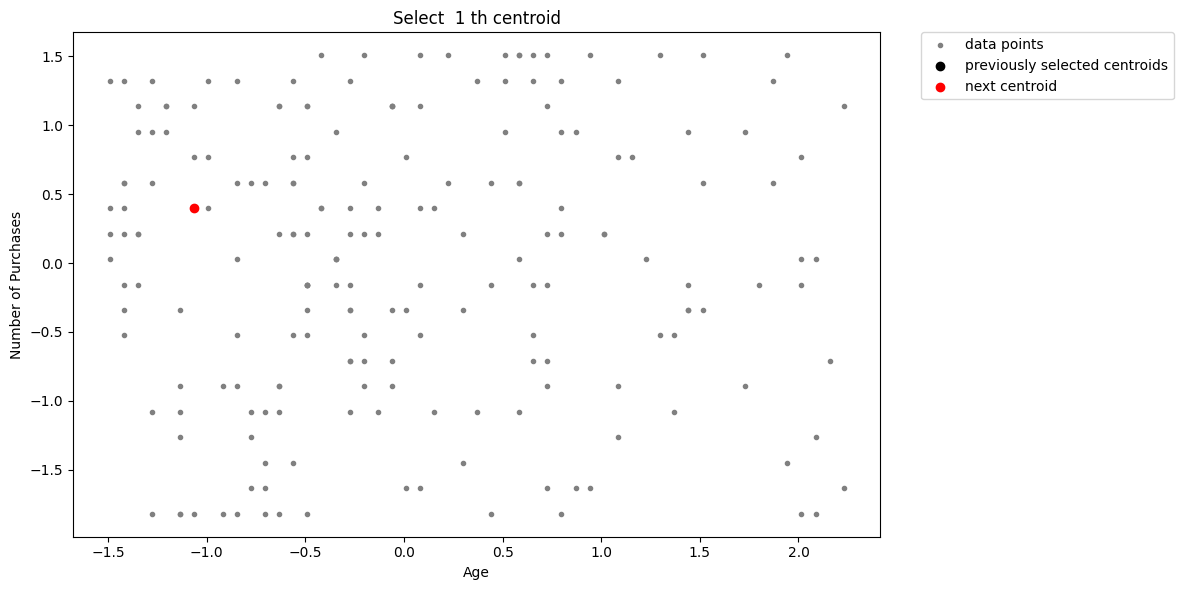

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [4]:
df_customers = read_present_data()

# data_analysis(df_customers)
# display(df_customers)

kmeans = KMeans(k = 4, max_iter = 5, method = 'kmeans++', show_initial_centroids=True, distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers, col_names = ['Age', 'Number of Purchases'], scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])




# if kmeans.n_columns == 3:
#     kmeans.save_gif("kmeans_3d_animation.gif")
# elif kmeans.n_columns > 3:
#     print("Cluster Array:")
#     print(kmeans.cluster_array)